# Laboratory 1 - Basic Operations, Gradient, Binary Images, Morphology

The goal of Laboratory 1 is to:
<ol>
  <li> Get familiar with basic input/output operations for 2-D images.
  <li> Implement basic functions using NumPy arrays (gradient of a 2-D image).
  <li> Get familiar with binary images and morphology operations.
  <li> Implement basic morphology operations: erosion, dilation, opening, closing.
</ol>


### Part I - Input/Output

Let's start with loading an exemplary 2-D image. The image is named "xray.jpg" and should be placed in the "Files" folder (/content).

However, the first thing to do is to load the necessary libraries.

In [169]:
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt 
import scipy.ndimage as nd
import numpy as np
from scipy import ndimage

%matplotlib inline


After importing the libraries - let's go into loading the exemplary "xray.jpg" and showing it using matplotlib.

Image shape: (598, 282)
Image dtype: uint8


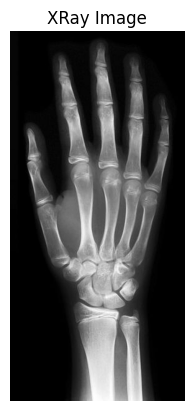

In [170]:
image = Image.open("xray.jpg")
image = np.array(image) 
print(f"Image shape: {image.shape}") 
print(f"Image dtype: {image.dtype}")

plt.figure(dpi=100)
plt.imshow(image, cmap='gray') 
plt.axis('off') 
plt.title("XRay Image")
plt.show()

### Part II - Calculating Image Gradient

The next task is to calculate the image gradient using a **np.gradient** function within NumPy.

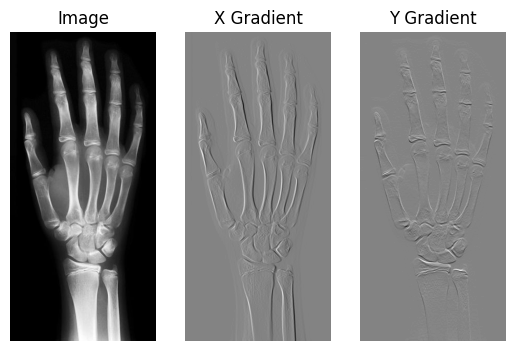

In [171]:
image = Image.open("xray.jpg")
image = np.array(image)


row_gradient, col_gradient = np.gradient(image)


plt.figure(dpi=100)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")

plt.subplot(1, 3, 2)
plt.imshow(col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient")

plt.subplot(1, 3, 3)
plt.imshow(row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient")

plt.show()


One can observe that the gradient shows the regions of intensity changes with respect to a given direction. Calculating image (in general any N-dimensional function) gradient is a basic building block for numerous image processing tasks.

The next task is to define and implement a function called **our_gradient** that implements the same functionality as the **np.gradient** function. The result of the **our_gradient** function should be the same as of the **np.gradient**.

The function should implement the central differences:
$$ \frac{\partial f(x, y)}{\partial x} = \frac{f(x + 1, y) -  f(x - 1, y)}{2}$$
$$ \frac{\partial f(x, y)}{\partial y} = \frac{f(x, y + 1) -  f(x, y - 1)}{2}$$
, for each pair __(x, y)__ defining the 2-D image (hint: double for loop or proper array slicing/indexing).

In [172]:
def our_gradient(image):
    
    rows, cols = image.shape

    
    row_gradient = np.zeros_like(image)
    col_gradient = np.zeros_like(image)

    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            row_gradient[i, j] = (image[i + 1, j] - image[i - 1, j]) / 2
            col_gradient[i, j] = (image[i, j + 1] - image[i, j - 1]) / 2

    return row_gradient, col_gradient


Test whether the proposed function works correctly:

C:\Users\Mateleo\AppData\Local\Temp\ipykernel_4584\427825570.py:13: RuntimeWarning: overflow encountered in scalar subtract
  col_gradient[i, j] = (image[i, j + 1] - image[i, j - 1]) / 2
C:\Users\Mateleo\AppData\Local\Temp\ipykernel_4584\427825570.py:12: RuntimeWarning: overflow encountered in scalar subtract
  row_gradient[i, j] = (image[i + 1, j] - image[i - 1, j]) / 2


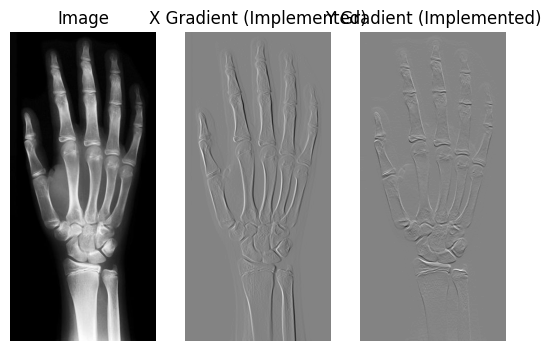

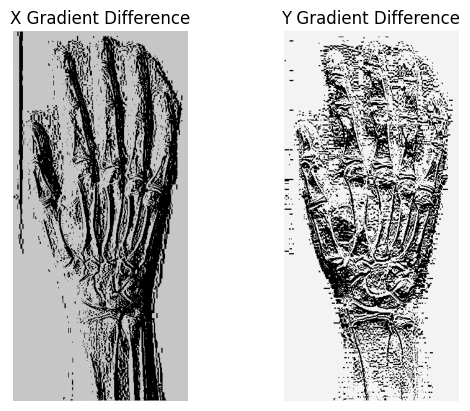

In [173]:

our_row_gradient, our_col_gradient = np.gradient(image)


row_gradient, col_gradient = our_gradient(image)


plt.figure(dpi=100)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Image")

plt.subplot(1, 3, 2)
plt.imshow(our_col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient (Implemented)")

plt.subplot(1, 3, 3)
plt.imshow(our_row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient (Implemented)")

plt.show()


plt.figure(dpi=100)

plt.subplot(1, 2, 1)
plt.imshow(our_col_gradient - col_gradient, cmap='gray')
plt.axis('off')
plt.title("X Gradient Difference")

plt.subplot(1, 2, 2)
plt.imshow(our_row_gradient - row_gradient, cmap='gray')
plt.axis('off')
plt.title("Y Gradient Difference")

plt.show()

Moreover, perform a quantitative test by calculating the mean squared error (MSE) between the NumPy function and the implemented function:

In [174]:


mse = lambda a, b: np.mean((a - b)**2)
print(f"MSE between row gradients: {mse(row_gradient, our_row_gradient)}")
print(f"MSE between column gradients: {mse(col_gradient, our_col_gradient)}")

MSE between row gradients: 4254.70269248559
MSE between column gradients: 5076.143044782846


### Part III - Binary Images

The next part is dedicated to binary images.

Binary images contain only two discrete values (e.g. True/False, 0/1, 0/255). They are a special kind of images that are often a result of the image processing/analysis pipeline (e.g. binary segmentation of a tumor).

Let's start with defining two functions generating synethetic binary images - circle and rectangle.

In [175]:
def generate_circle(x_size, y_size, x_origin, y_origin, radius):
    
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    
    
    distances = np.sqrt((x - x_origin)**2 + (y - y_origin)**2)
    
    
    circle = distances <= radius
    
    return circle.astype(int)

def generate_rectangle(x_size, y_size, x_b, y_b, width, height):
    
    x, y = np.meshgrid(np.arange(x_size), np.arange(y_size))
    
    
    rectangle = np.logical_and(
        np.logical_and(x >= x_b, x < x_b + width),
        np.logical_and(y >= y_b, y < y_b + height)
    )
    
    return rectangle.astype(int)


Let's try to use these functions to generate exemplary circle and rectangle.

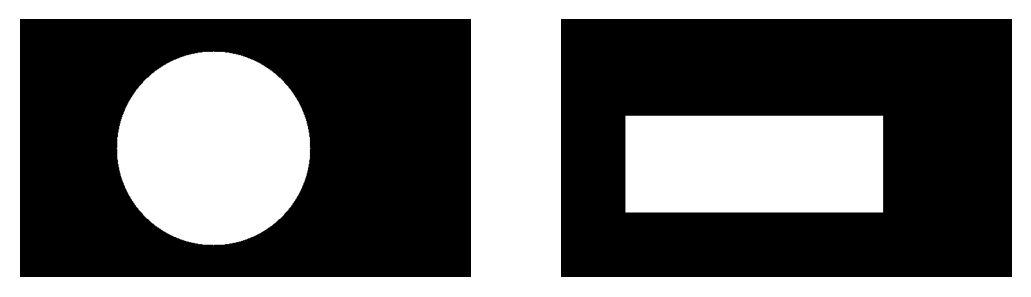

In [176]:
x_size, y_size = 700, 400
x_origin, y_origin = 300, 200
radius = 150
x_b, y_b =  100, 150
width, height = 400, 150
circle = generate_circle(x_size, y_size, x_origin, y_origin, radius)
rectangle = generate_rectangle(x_size, y_size, x_b, y_b, width, height)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

Both the circle are sucessfully generated. Let's add a bit of binary noise now - it will be useful in the next part of the notebook.

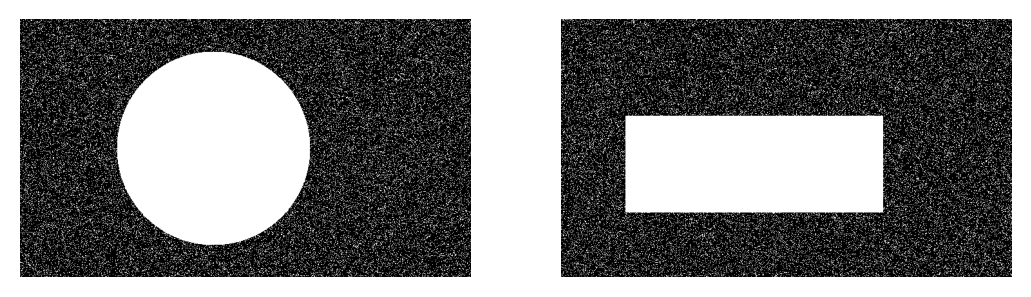

In [177]:
circle = np.logical_or(circle, np.abs(np.random.randn(y_size, x_size)) > 1.5)
rectangle = np.logical_or(rectangle, np.abs(np.random.randn(y_size, x_size)) > 1.5)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(circle, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rectangle, cmap='gray')
plt.axis('off')
plt.show()

### Part IV - Morphological Operations

The most commonly used morphological operatons are:
<ol>
  <li> Erosion
  <li> Dilation
  <li> Opening (erosion followed by dilation)
  <li> Closing (dilation followed by erosion)
</ol>

They are common pre- or post-processing steps for binary images.

For a good description of morphological operations please visit: 
<ol>
 <li> https://en.wikipedia.org/wiki/Erosion_(morphology)
 <li> https://en.wikipedia.org/wiki/Dilation_(morphology)
 <li> https://en.wikipedia.org/wiki/Opening_(morphology)
 <li> https://en.wikipedia.org/wiki/Closing_(morphology)
</ol>

In this part you are going to use the function available in the SciPy library and then implement your own with similiar behavior.

Let's start with using the SciPy functions.

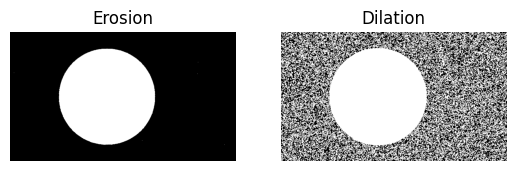

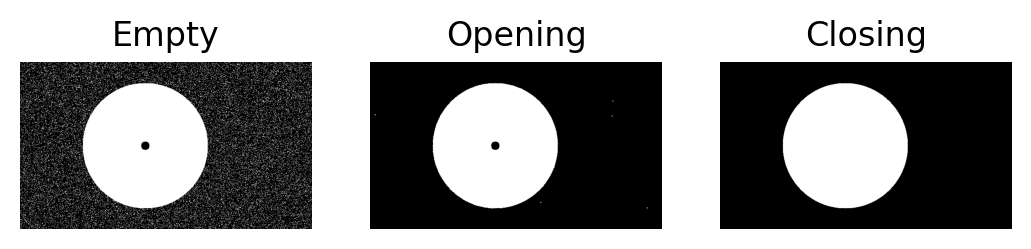

In [178]:
eroded_circle = ndimage.binary_erosion(circle)
dilated_circle = ndimage.binary_dilation(circle)
inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) 
opened_circle = ndimage.binary_opening(empty_circle)
circle2 = generate_circle(x_size, y_size, x_origin, y_origin, radius)
closed_opened_circle = ndimage.binary_closing(circle2)

plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()


Now implement your own functions, performing the same operations.

In [179]:
def erosion(image, se):
    result = np.zeros_like(image)
    se_height, se_width = se.shape
    padded_image = np.pad(image, ((se_height//2, se_height//2), (se_width//2, se_width//2)), mode='constant', constant_values=0)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.min(padded_image[i:i+se_height, j:j+se_width] * se)

    return result

def dilation(image, se):
    result = np.zeros_like(image)
    se_height, se_width = se.shape
    padded_image = np.pad(image, ((se_height//2, se_height//2), (se_width//2, se_width//2)), mode='constant', constant_values=0)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            result[i, j] = np.max(padded_image[i:i+se_height, j:j+se_width] * se)

    return result

def opening(image, se):
    eroded = erosion(image, se)
    opened = dilation(eroded, se)
    return opened

def closing(image, se):
    dilated = dilation(image, se)
    closed = erosion(dilated, se)
    return closed

Test whether the implemented functions work correctly:

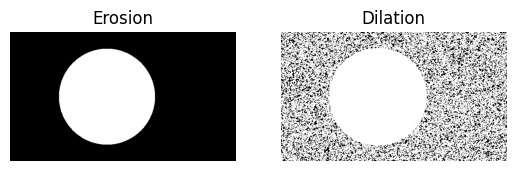

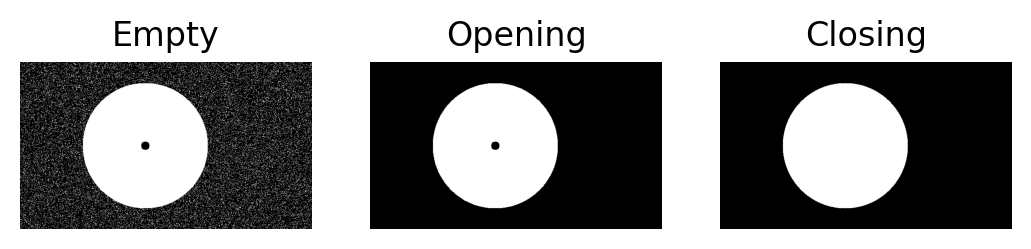

In [180]:
inner_circle = generate_circle(x_size, y_size, x_origin, y_origin, 10)
empty_circle = np.logical_and(circle, np.logical_not(inner_circle)) 


own_eroded_circle = erosion(circle, np.ones((3, 3)))


own_dilated_circle = dilation(circle, np.ones((3, 3)))


own_opened_circle = opening(empty_circle, np.ones((3, 3)))


circle2 = generate_circle(x_size, y_size, x_origin, y_origin, radius)
own_closed_opened_circle = closing(circle2, np.ones((3, 3)))


plt.figure(dpi=100)
plt.subplot(1, 2, 1)
plt.imshow(own_eroded_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Erosion")
plt.subplot(1, 2, 2)
plt.imshow(own_dilated_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Dilation")
plt.show()

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(empty_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Empty")
plt.subplot(1, 3, 2)
plt.imshow(own_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Opening")
plt.subplot(1, 3, 3)
plt.imshow(own_closed_opened_circle, cmap='gray', vmin=0, vmax=1)
plt.axis('off')
plt.title("Closing")
plt.show()


In [181]:
def calculate_mse(image1, image2):
    mse = np.mean(np.logical_xor(image1, image2).astype(int)**2)
    return mse


And also check the results quantitatively:

In [182]:
mse_eroded = calculate_mse(eroded_circle, own_eroded_circle)
mse_dilated = calculate_mse(dilated_circle, own_dilated_circle)
mse_closed = calculate_mse(closed_opened_circle, own_closed_opened_circle)
mse_opened = calculate_mse(opened_circle, own_opened_circle)


print(f"MSE between erosions: {mse_eroded}")
print(f"MSE between dilations: {mse_dilated}")
print(f"MSE between closing results: {mse_closed}")
print(f"MSE between opening results: {mse_opened}")


MSE between erosions: 0.0013
MSE between dilations: 0.15888214285714286
MSE between closing results: 0.0
MSE between opening results: 0.0002535714285714286


### Conclusion

This is the end of Laboratory 1. You should be now familiar with:
<ol>
  <li> Loading 2-D images using PIL library.
  <li> Generating synthetic 2-D images.
  <li> Implementing basic functions like gradient calculation or morphology operations.
</ol>

The next laboratory will discuss the convolution/correlation operators and how to implement basic neural networks in PyTorch.